# Análisis del bienestar de las entidades de México con indicadores del 2014. 

En esta libreta se analizara informacion de los estados de Mexico para intentar descubrir patrones que permitan realizar conclusiones.

In [33]:
import numpy as np
import pandas as pd

doc = 'indicadores_bienestar_2014.csv'

bienestar = pd.read_csv(doc, index_col = 0, thousands  = ',')
bienestar.index.names = ['Estado']
bienestar.columns.names = ['Indicadores']
bienestar = bienestar[1:]

Primero seleccione informacion referente a la educacion y a la calidad de vida. Con esta informacion se tratara de realizar conclusiones.

In [34]:
columnas  = ['Niveles de educación',
           'Deserción escolar',
           'Años promedio de escolaridad',
           'Satisfacción con la vida',
           'Habitaciones por persona',
           'Porcentaje de viviendas con techos de materiales resistentes',
           'Gini del ingreso disponible de los hogares per cápita',
           'Acceso a servicios de salud',
           'Hogares con acceso a banda ancha', 
           'Viviendas con acceso a servicios básicos']
bienestar = bienestar[columnas]
bienestar.head()

Indicadores,Niveles de educación,Deserción escolar,Años promedio de escolaridad,Satisfacción con la vida,Habitaciones por persona,Porcentaje de viviendas con techos de materiales resistentes,Gini del ingreso disponible de los hogares per cápita,Acceso a servicios de salud,Hogares con acceso a banda ancha,Viviendas con acceso a servicios básicos
Estado,,,,,,,,,,
Aguascalientes,42.5,12.1,9.7,7.7,1.0,94.9,0.49,87.9,37.92,98.0
Baja California,44.8,19.3,9.7,8.3,1.1,49.5,0.43,80.6,51.46,94.7
Baja California Sur,48.4,11.7,9.8,8.3,1.0,74.8,0.45,84.9,43.85,91.6
Campeche,40.6,15.0,9.1,7.8,0.8,52.7,0.50,89.3,27.10,89.8
Coahuila de Zaragoza,42.9,19.1,9.8,8.0,1.1,77.8,0.50,87.2,34.56,96.0


Resumen de los datos.

In [35]:
bienestar.describe()

Indicadores,Niveles de educación,Deserción escolar,Años promedio de escolaridad,Satisfacción con la vida,Habitaciones por persona,Porcentaje de viviendas con techos de materiales resistentes,Gini del ingreso disponible de los hogares per cápita,Acceso a servicios de salud,Hogares con acceso a banda ancha,Viviendas con acceso a servicios básicos
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,39.875000,13.100000,9.096875,7.953125,0.956250,70.953125,0.480313,85.387500,33.519375,89.034375
std,6.587917,4.188001,0.819711,0.239602,0.113415,16.982116,0.030319,2.951517,11.083372,8.799802
min,27.700000,2.800000,7.200000,7.500000,0.700000,29.800000,0.410000,77.200000,9.470000,60.200000
25%,35.425000,11.100000,8.675000,7.800000,0.900000,64.100000,0.460000,84.400000,25.762500,86.450000
50%,40.700000,13.000000,9.200000,7.900000,1.000000,75.100000,0.480000,85.750000,32.825000,91.650000
75%,43.100000,15.975000,9.525000,8.125000,1.000000,82.925000,0.500000,87.275000,41.765000,94.700000
max,58.800000,19.300000,11.100000,8.400000,1.200000,94.900000,0.570000,90.900000,55.100000,98.500000


# Reducción de la dimensionalidad con PCA

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(bienestar)
pcaBienestar = pca.transform(bienestar)

pcaBienestar_df = pd.DataFrame(pcaBienestar)
pcaBienestar_df.index = bienestar.index
pcaBienestar_df.columns = ['CP_1','CP_2']

pcaBienestar_df.head()

,CP_1,CP_2
Estado,,
Aguascalientes,-24.936020,-7.776957
Baja California,6.698183,28.455149
Baja California Sur,-10.296573,8.724910
Campeche,16.736139,6.060703
Coahuila de Zaragoza,-8.996280,-0.075831


In [37]:
print(pca.explained_variance_ratio_)

[ 0.7233169   0.18339206]


Visualización de los resultados del análisis en componentes principales.

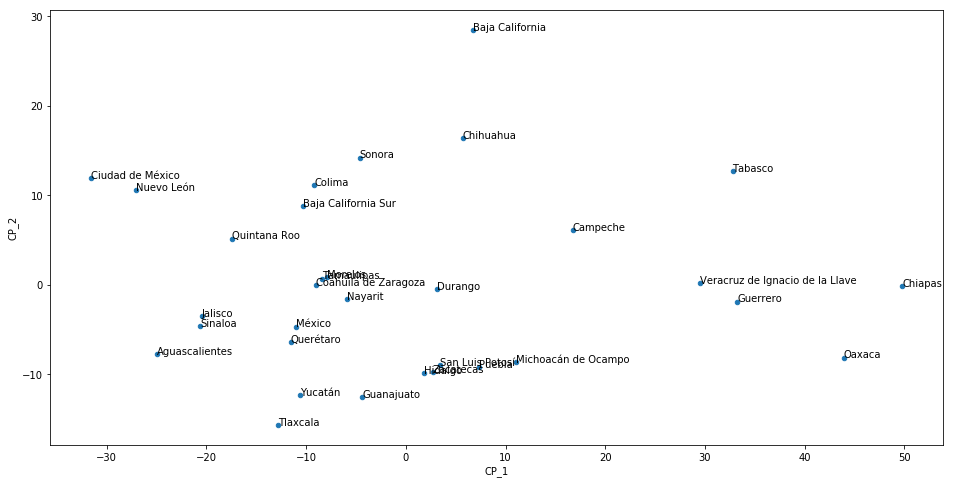

In [38]:
%matplotlib inline

ax = pcaBienestar_df.plot(kind='scatter', x='CP_1', y='CP_2', figsize=(16,8))

for i, Estado in enumerate(pcaBienestar_df.index):
    ax.annotate(Estado, (pcaBienestar_df.iloc[i].CP_1, pcaBienestar_df.iloc[i].CP_2))

# Clustering con K-medias

In [39]:
from sklearn.cluster import KMeans

Text(0.5,1,'Selección de K con el método del codo')

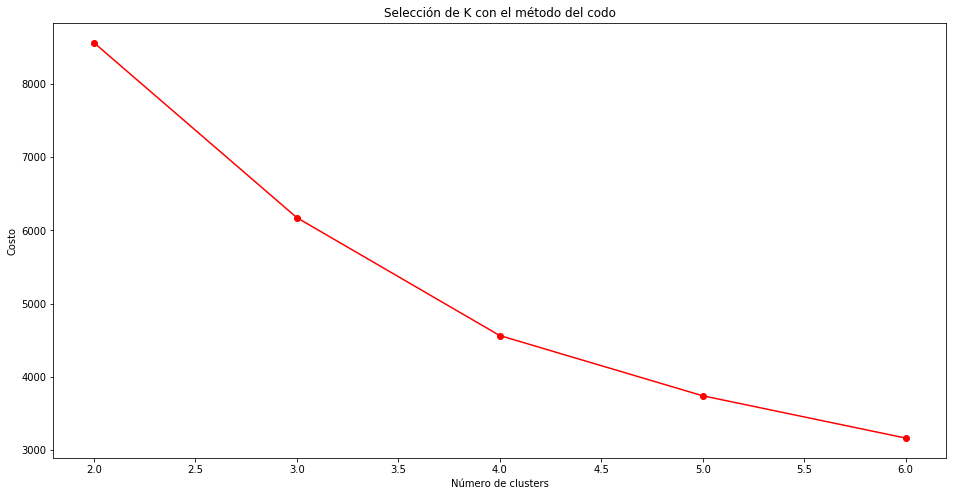

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
maxK = 6
listaK = range(2,maxK + 1)
costos=[]

for k in listaK:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(bienestar)
    costos.append(-kmeans.score(bienestar))
    
plt.figure(figsize=(16,8))
plt.plot(listaK, costos, '-or')
plt.xlabel('Número de clusters')
plt.ylabel('Costo')
plt.title('Selección de K con el método del codo')

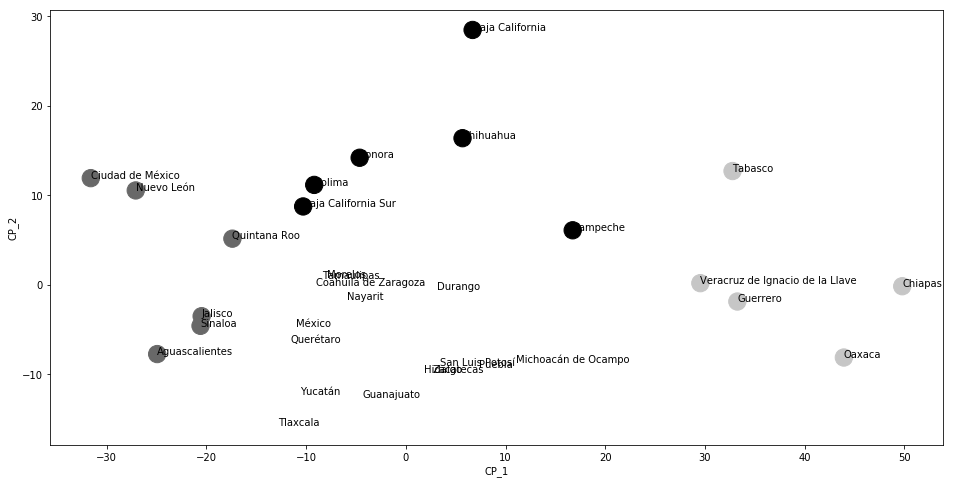

In [41]:
K = 4
kmeans = KMeans(n_clusters=K)
clusters = kmeans.fit(bienestar)
pcaBienestar_df['grupos'] = pd.Series(clusters.labels_, index=pcaBienestar_df.index)


ax = pcaBienestar_df.plot(kind='scatter', x='CP_1', y='CP_2', 
                     c=pcaBienestar_df.grupos.astype(float),
                     figsize=(16,8), s=300)

for i, Estado in enumerate(pcaBienestar_df.index):
    ax.annotate(Estado, (pcaBienestar_df.iloc[i].CP_1, pcaBienestar_df.iloc[i].CP_2))


# Análisis de los prototipos

Visualización de como se comportan los prototipos encontrados por las k-medias.

In [49]:
prototipos_df = pd.DataFrame(kmeans.cluster_centers_)
prototipos_df.index = ['P'+str(i + 1) for i in range(K)]
prototipos_df.columns = bienestar.columns
prototipos_df.index.names = ['Estado']
prototipos_df.columns.names = ['Prototipo']

prototipos_df

Prototipo,Niveles de educación,Deserción escolar,Años promedio de escolaridad,Satisfacción con la vida,Habitaciones por persona,Porcentaje de viviendas con techos de materiales resistentes,Gini del ingreso disponible de los hogares per cápita,Acceso a servicios de salud,Hogares con acceso a banda ancha,Viviendas con acceso a servicios básicos
Estado,,,,,,,,,,
P1,37.746667,13.46,8.960000,7.953333,0.966667,77.286667,0.480000,85.74,29.998000,90.066667
P2,33.160000,13.52,7.980000,7.740000,0.800000,41.140000,0.498000,84.60,18.792000,71.900000
P3,46.583333,10.10,9.883333,8.000000,1.016667,89.033333,0.483333,84.55,45.381667,96.300000
P4,44.083333,14.85,9.583333,8.083333,1.000000,61.883333,0.463333,86.00,42.733333,93.466667


Grafica de barra comparando los 10 indicadores con los 4 prototipos.

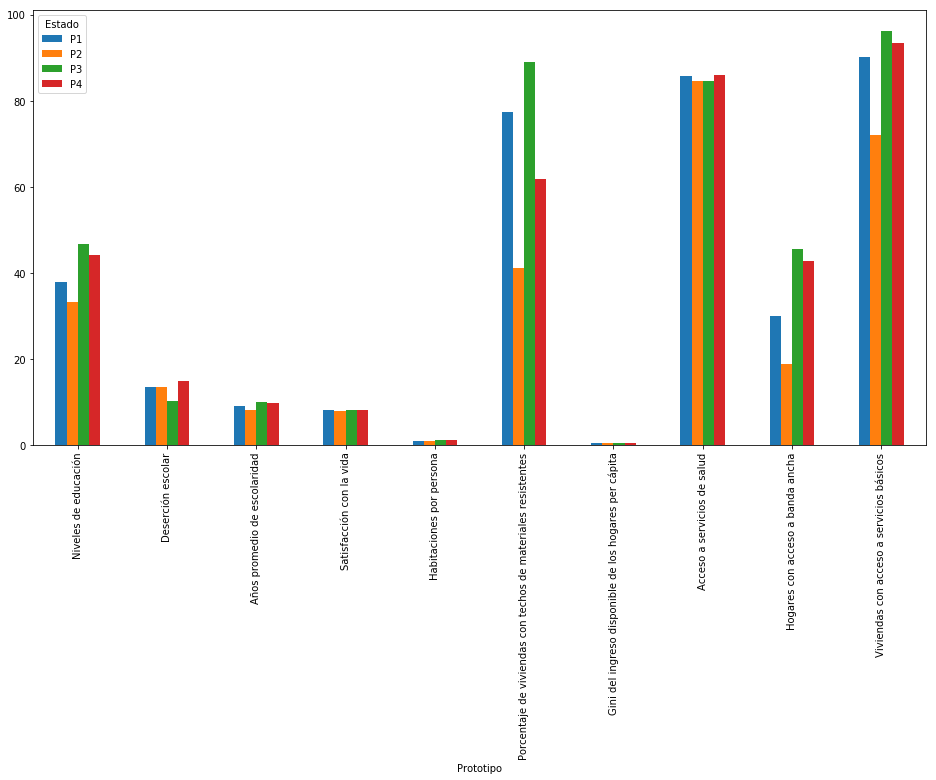

In [50]:
prototipos_df.T.plot(figsize=(16,8), kind="bar")

Aqui se vizualizan los prototipos por cada indicador.

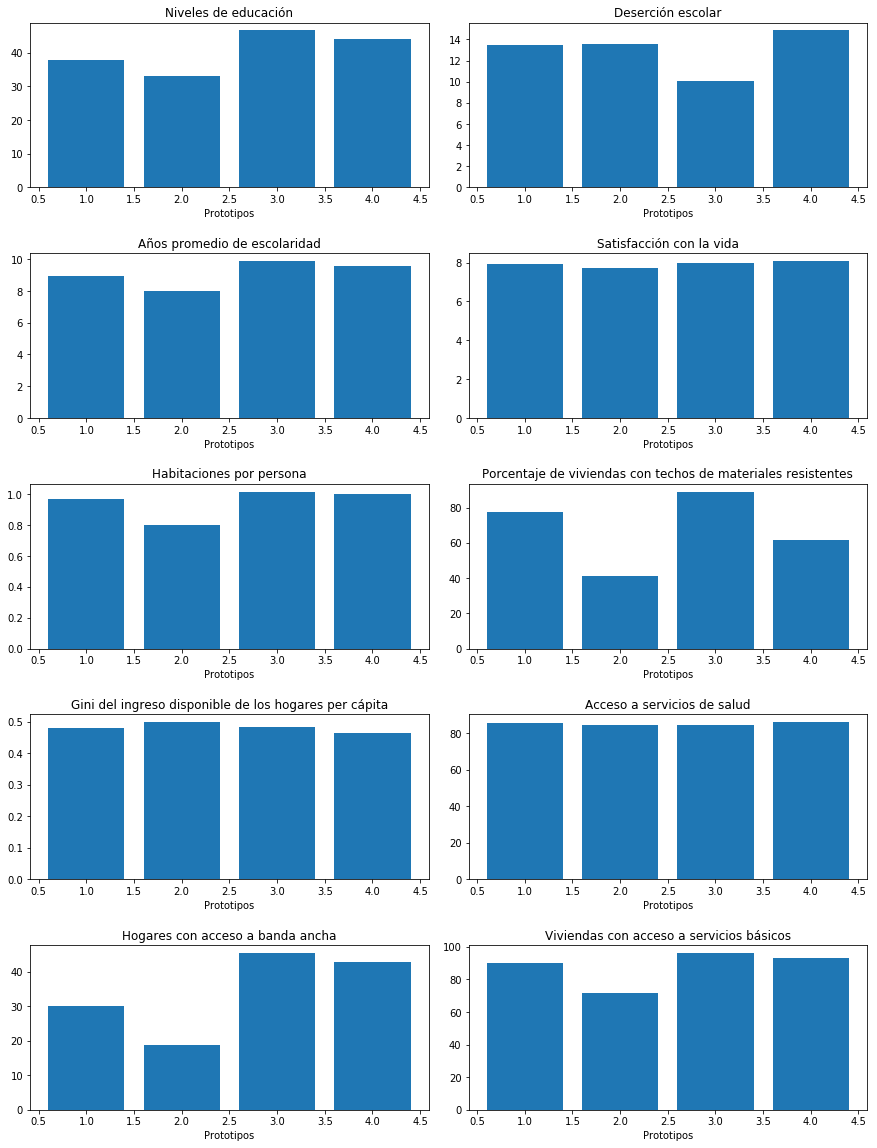

In [53]:
fig, axes = plt.subplots(ncols = 2, nrows = 5, figsize = (15, 20))

ind = [(i, j) for i in range(5) for j in range(2)]

for indicador, (i, j) in zip(columnas, ind):
    axes[i, j].bar([1, 2, 3, 4], prototipos_df[indicador])
    axes[i, j].set(title = indicador)
    axes[i, j].set(xlabel = 'Prototipos')

fig.subplots_adjust(wspace = 0.1, hspace = 0.4)

# Conclusión

El conjunto con nivel de educacion mayor, menor descerción escolar y años promedio de escolaridad muestran ser el mayor o practicamente igual al mayor en todos los indicadores de calidad de vida por lo que parece que los que logran tener una mejor calidad de estudios aseguran tener una calidad de vida bastante buena.

Aunque esto no quiere decir que siempre alguien con estudios lograra una mejor vida que alguien sin estudios, pero parece que en general tienen una mayor tranquilidad.